In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [66]:
data = pd.read_csv('/Users/jordan.arlan/Documents/DS100/Data/nbastats2018-2019.csv')
data.columns

Index(['Name', 'Height', 'Weight', 'Team', 'Age', 'Salary', 'Points', 'Blocks',
       'Steals', 'Assists', 'Rebounds', 'FT%', 'FTA', 'FG3%', 'FG3A', 'FG%',
       'FGA', 'MP', 'G', 'PER', 'OWS', 'DWS', 'WS', 'WS48', 'USG', 'BPM',
       'VORP'],
      dtype='object')

In [67]:
data = data[data["Salary"] != "-"]

# Convert columns to float where possible
for column in data.columns:
    try:
        data[column] = data[column].astype(float)
    except:
        continue

# Display the datatypes of the columns after conversion
data.dtypes

Name         object
Height      float64
Weight      float64
Team         object
Age         float64
Salary      float64
Points      float64
Blocks      float64
Steals      float64
Assists     float64
Rebounds    float64
FT%         float64
FTA         float64
FG3%        float64
FG3A        float64
FG%         float64
FGA         float64
MP          float64
G           float64
PER         float64
OWS         float64
DWS         float64
WS          float64
WS48        float64
USG         float64
BPM         float64
VORP        float64
dtype: object

In [68]:
# Replace null values with 0
data.fillna(0, inplace=True)


In [69]:
cols = ['Height', 'Weight', 'Age', 'Points', 'Blocks',
       'Steals', 'Assists', 'Rebounds', 'FT%', 'FTA', 'FG3%', 'FG3A', 'FG%',
       'FGA', 'MP', 'G', 'PER', 'OWS', 'DWS', 'WS', 'WS48', 'USG', 'BPM',
       'VORP']

In [70]:
X = data[cols]
X.insert(0, 'Bias', 1)
X = X.to_numpy()
X.shape


(470, 25)

In [71]:
# For nba data
Y = np.log(data[["Salary"]].to_numpy())
n = len(Y)
print("number datapoints", n)
Y[:5]

number datapoints 470


array([[15.51208644],
       [12.27349295],
       [12.3751992 ],
       [17.00009734],
       [14.89929343]])

In [72]:
random_theta = np.random.randn(25)
random_theta

array([ 0.07675038,  0.15113858,  0.20872158, -1.21955453,  0.20902516,
       -0.31247061,  0.77245777, -1.11653249, -0.20556831,  0.67778119,
        0.73959721,  0.10570419, -0.16758166, -0.6570241 , -0.31992805,
       -0.24991949, -0.58206472, -0.6366635 , -0.23978577, -1.18699813,
        0.74035363, -0.63709759,  2.77267212, -1.0998822 ,  1.32220145])

In [73]:
display((X @ random_theta)[:5])

display(Y[:5])

array([32.14917859, 48.2064525 , 35.6585595 , 17.76515382, 17.53020117])

array([[15.51208644],
       [12.27349295],
       [12.3751992 ],
       [17.00009734],
       [14.89929343]])

In [74]:
def mse_nba(theta):
    return (1/n) * (np.linalg.norm(Y - X @ theta) ** 2)

mse_nba(random_theta)

430000.9160559659

In [75]:
from numpy.linalg import inv
def least_squares_estimate(X, Y):
    return inv(X.T @ X) @ X.T @ Y

theta_hat = least_squares_estimate(X, Y)
theta_hat

array([[ 6.33528915e+00],
       [ 4.35217986e-02],
       [ 5.99557178e-03],
       [ 8.07397343e-02],
       [-1.16442558e-01],
       [ 1.06263295e-01],
       [ 3.06386733e-01],
       [ 1.30106977e-01],
       [ 9.89048299e-02],
       [ 1.54144269e-01],
       [ 2.79170348e-02],
       [-4.93205678e-01],
       [ 2.36345017e-02],
       [ 2.76126736e-01],
       [ 1.50473231e-01],
       [ 1.82500108e-02],
       [ 9.84067005e-03],
       [-1.50606411e-01],
       [-8.02405584e-03],
       [-1.84737552e-01],
       [ 1.72094694e-01],
       [ 5.28396735e+00],
       [ 8.34846145e-02],
       [ 9.45715230e-02],
       [-3.30294883e-01]])

In [76]:
print("Arbitrary theta MSE: ", mse_nba(random_theta))
print("Optimal theta MSE:"  , mse_nba(theta_hat))

Arbitrary theta MSE:  430000.9160559659
Optimal theta MSE: 0.8394234161224691


In [77]:
Y_hat = X @ theta_hat

In [78]:
fig = px.scatter(x = Y_hat.flatten(), y = (Y - Y_hat).flatten(), opacity=0.8, width=600, height=400)
fig.add_trace(go.Scatter(x=[0, 30], y=[0,0], name="$\hat{Y}=Y$"))
fig.update_xaxes(title="$\hat{Y}$")
fig.update_yaxes(title="$\hat{Y} - Y$")
fig

In [79]:
r2_ast_fg_3pa = np.var(Y_hat) / np.var(Y)
r2_ast_fg_3pa

0.567045819266418

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define features and target
X = data.drop(columns=["Name", "Salary"])
y = np.log(data["Salary"])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns for one-hot encoding
categorical_cols = [cname for cname in X_train.columns if 
                    X_train[cname].dtype == "object"]

# Define the data preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)],  # One-hot encode categorical columns
    remainder=StandardScaler())  # Standardize numerical columns

# Display the first few rows of the training data after preprocessing
pd.DataFrame(preprocessor.fit_transform(X_train)).head()


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.162958,0.030906,0.082138,-0.210299,-0.536257,0.824022,0.344174,0.423909,-0.294029,-0.154769
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.378199,-0.431613,-1.013559,-0.059930,-0.389615,-0.332885,0.282462,-0.550375,-0.337892,-0.747774
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.059798,-2.721084,0.824983,-1.993242,-0.609578,-1.302185,-0.843775,-0.841136,-0.090760,-0.744344
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.303399,0.054032,-0.066431,0.197844,0.050311,-0.051475,0.780012,-0.160154,-0.357149,0.014078
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.131545,-1.298837,1.047837,-1.499173,-1.416108,-0.624717,0.008617,-0.293670,0.848557,0.593301


In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

# Preprocessing of training data and train model
pipeline.fit(X_train, y_train)

# Preprocessing of testing data and get predictions
preds = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

mae, mse, r2


(0.7149261552973764, 0.9118430861910141, 0.5351961240983869)

In [88]:
# Feature Engineering

# 1. Player Efficiency
data['Player_Efficiency'] = (data['Points'] + data['Rebounds'] + 
                                    data['Assists'] + data['Steals'] + 
                                    data['Blocks'])

# 2. Shooting Efficiency
data['Shooting_Efficiency'] = (data['FG%'] + data['FG3%'] + 
                                       data['FT%']) / 3

# 3. Usage Efficiency
data['Usage_Efficiency'] = data['Player_Efficiency'] * data['USG']

# 4. Team Impact
data['Team_Impact'] = data['VORP'] * data['BPM']

# 5. Scoring rate per minute
data['Scoring_Rate'] = data['Points'] / data['MP']

# Split the data again after feature engineering
X = data.drop(columns=["Name", "Salary"])
y = data["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-train and evaluate the model with the new features
pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)
mae_fe = mean_absolute_error(y_test, preds)
mse_fe = mean_squared_error(y_test, preds)
r2_fe = r2_score(y_test, preds)

mae_fe, mse_fe, r2_fe


(3524401.2779787234, 24103339837112.598, 0.6002941980054821)

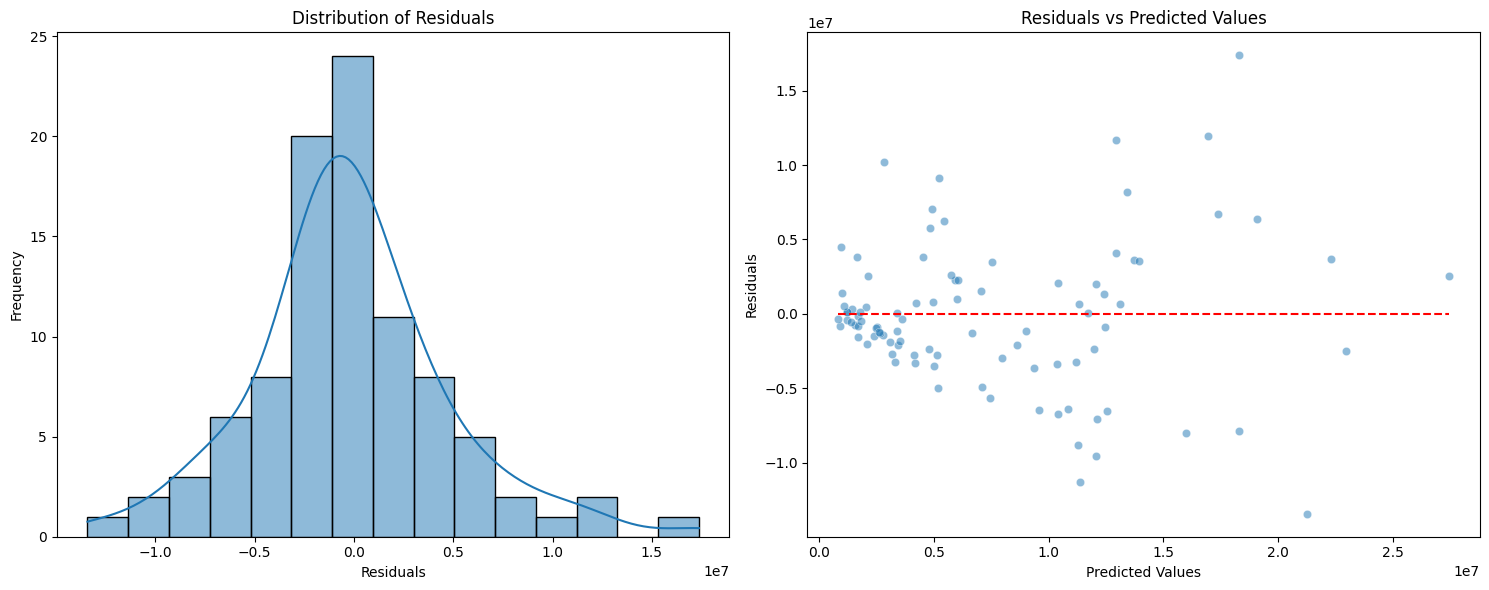

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions using the best model
best_preds = preds

# Compute residuals
residuals = y_test - best_preds

# Plotting residuals
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Residuals distribution
sns.histplot(residuals, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Residuals')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Residuals vs Predicted values
sns.scatterplot(x=best_preds, y=residuals, alpha=0.5, ax=ax[1])
ax[1].hlines(0, xmin=best_preds.min(), xmax=best_preds.max(), colors='r', linestyles='--')
ax[1].set_title('Residuals vs Predicted Values')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()